In [1]:
import os
import fnmatch
import geopandas as gpd

In [2]:
data_path = '/Users/bendalllab/Documents/NameUsProject/'
# source: namus.gov
csv_filepath = os.path.join(data_path, '20191102_NamUs_missing.csv')
NamUs_missing = pd.read_csv(csv_filepath)
Does_filepath = os.path.join(data_path, '20191102_NamUs_unidentified.csv')
NamUs_Does = pd.read_csv(Does_filepath)
# source: census.gov
census_path = os.path.join(data_path, 'nst-est2019-alldata.csv')
census_pop = pd.read_csv(census_path)

In [4]:
NamUs_missing.head(5)

,Case Number,DLC,Last Name,First Name,Missing Age,City,County,State,Sex,Race / Ethnicity,Date Modified
0,MP61231,10/28/2019,LOPEZ,SELENA,17 Years,RED BANK,Hamilton,TN,Female,Hispanic / Latino,11/01/2019
1,MP61141,10/26/2019,Williams,Dazanik,22 Years,Oak Park,Oakland,MI,Female,Black / African American,10/29/2019
2,MP61143,10/26/2019,Jenkin,Kyle,16 Years,Vanderbilt,Marquette,MI,Male,White / Caucasian,10/29/2019
3,MP61199,10/25/2019,AUSTIN,PRISCILLA,38 Years,TRUMANN,Poinsett,AR,Female,White / Caucasian,10/29/2019
4,MP61130,10/25/2019,Flores,Carlos,15 Years,Springdale,Washington,AR,Male,White / Caucasian,10/28/2019


In [5]:
NamUs_Does.head(5)

,Case,ME/C Case,DBF,Age From,Age To,City,County,State,Sex,Race / Ethnicity,Date Modified
0,UP61276,ME/C Case CC-19-0916,10/29/2019,NaN,NaN,Coatesville,Chester,Pennsylvania,Unsure,Uncertain,11/01/2019
1,UP61013,ME/C Case 04191170,10/21/2019,50.0,99.0,Voorhees,Camden,New Jersey,Female,"White / Caucasian, Other",11/01/2019
2,UP61006,ME/C Case 19-2808,10/15/2019,25.0,45.0,NaN,Pima,Arizona,Female,Hispanic / Latino,10/29/2019
3,UP61206,ME/C Case ME2019-04775,10/10/2019,NaN,NaN,Willow Springs,Cook,Illinois,Unsure,Uncertain,10/31/2019
4,UP61026,ME/C Case 19S037339,10/07/2019,20.0,45.0,Ingot,Shasta,California,Male,Hispanic / Latino,10/29/2019


In [6]:
USstates = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [7]:
NamUs_missing['state_name'] = NamUs_missing['State'].map(USstates)

In [8]:
NamUs_missing.to_csv(csv_filepath, index = False)

In [9]:
print(NamUs_missing.columns)

Index(['Case Number', 'DLC', 'Last Name', 'First Name', 'Missing Age', 'City',
       'County', 'State', 'Sex', 'Race / Ethnicity', 'Date Modified',
       'state_name'],
      dtype='object')


In [3]:
state_counts = pd.DataFrame(data = NamUs_missing.groupby('state_name').apply(len))
state_counts.reset_index(inplace = True)
state_counts.rename(columns = {0: 'counts'}, inplace = True)                                                

In [4]:
state_counts.head(5)

,state_name,counts
0,Alabama,156
1,Alaska,172
2,Arizona,727
3,Arkansas,187
4,California,1226


In [5]:
state_path = os.path.join(data_path, 'missing_state_counts.csv')
state_counts.to_csv(state_path, index = False)

In [6]:
census_pop.columns.tolist()

['SUMLEV',
 'REGION',
 'DIVISION',
 'STATE',
 'NAME',
 'CENSUS2010POP',
 'ESTIMATESBASE2010',
 'POPESTIMATE2010',
 'POPESTIMATE2011',
 'POPESTIMATE2012',
 'POPESTIMATE2013',
 'POPESTIMATE2014',
 'POPESTIMATE2015',
 'POPESTIMATE2016',
 'POPESTIMATE2017',
 'POPESTIMATE2018',
 'POPESTIMATE2019',
 'NPOPCHG_2010',
 'NPOPCHG_2011',
 'NPOPCHG_2012',
 'NPOPCHG_2013',
 'NPOPCHG_2014',
 'NPOPCHG_2015',
 'NPOPCHG_2016',
 'NPOPCHG_2017',
 'NPOPCHG_2018',
 'NPOPCHG_2019',
 'BIRTHS2010',
 'BIRTHS2011',
 'BIRTHS2012',
 'BIRTHS2013',
 'BIRTHS2014',
 'BIRTHS2015',
 'BIRTHS2016',
 'BIRTHS2017',
 'BIRTHS2018',
 'BIRTHS2019',
 'DEATHS2010',
 'DEATHS2011',
 'DEATHS2012',
 'DEATHS2013',
 'DEATHS2014',
 'DEATHS2015',
 'DEATHS2016',
 'DEATHS2017',
 'DEATHS2018',
 'DEATHS2019',
 'NATURALINC2010',
 'NATURALINC2011',
 'NATURALINC2012',
 'NATURALINC2013',
 'NATURALINC2014',
 'NATURALINC2015',
 'NATURALINC2016',
 'NATURALINC2017',
 'NATURALINC2018',
 'NATURALINC2019',
 'INTERNATIONALMIG2010',
 'INTERNATIONALMIG201

In [7]:
census_pop.head(5)

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


In [8]:
census_pop['NAME'].unique()

array(['United States', 'Northeast Region', 'Midwest Region',
       'South Region', 'West Region', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [9]:
census_pop.set_index('NAME', inplace = True)
pop_19 = census_pop['POPESTIMATE2019'].to_dict()
state_counts.set_index('state_name', inplace = True)
missing_counts = state_counts.to_dict()

In [10]:
missing_counts

{'counts': {'Alabama': 156,
  'Alaska': 172,
  'Arizona': 727,
  'Arkansas': 187,
  'California': 1226,
  'Colorado': 177,
  'Connecticut': 125,
  'Delaware': 34,
  'District of Columbia': 23,
  'Florida': 823,
  'Georgia': 192,
  'Guam': 1,
  'Hawaii': 107,
  'Idaho': 48,
  'Illinois': 198,
  'Indiana': 108,
  'Iowa': 45,
  'Kansas': 44,
  'Kentucky': 162,
  'Louisiana': 180,
  'Maine': 50,
  'Maryland': 105,
  'Massachusetts': 74,
  'Michigan': 350,
  'Minnesota': 69,
  'Mississippi': 74,
  'Missouri': 218,
  'Montana': 44,
  'Nebraska': 46,
  'Nevada': 114,
  'New Hampshire': 17,
  'New Jersey': 223,
  'New Mexico': 99,
  'New York': 314,
  'North Carolina': 210,
  'North Dakota': 9,
  'Northern Mariana Islands': 2,
  'Ohio': 212,
  'Oklahoma': 267,
  'Oregon': 260,
  'Pennsylvania': 238,
  'Puerto Rico': 13,
  'Rhode Island': 6,
  'South Carolina': 128,
  'South Dakota': 17,
  'Tennessee': 412,
  'Texas': 927,
  'Utah': 59,
  'Vermont': 36,
  'Virgin Islands': 13,
  'Virginia': 139

In [11]:
map_path = '/Users/bendalllab/Documents/NameUsProject/cb_2018_us_state_20m'
usa_path = os.path.join(map_path, 'cb_2018_us_state_20m.shp')
us_map = gpd.read_file(usa_path)

In [12]:
us_map['2019_pop_est'] = us_map['NAME'].map(pop_19)
us_map['missing_counts'] = us_map['NAME'].map(missing_counts['counts'])
us_map['frac_of_state'] = us_map['missing_counts']/us_map['2019_pop_est']

In [13]:
us_map.head(5)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,2019_pop_est,missing_counts,frac_of_state
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",6045680,105,0.000017
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",3155070,45,0.000014
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",973764,34,0.000035
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",11689100,212,0.000018
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",12801989,238,0.000019


In [46]:
us_map['NAME'].unique()

array(['Maryland', 'Iowa', 'Delaware', 'Ohio', 'Pennsylvania', 'Nebraska',
       'Washington', 'Puerto Rico', 'Alabama', 'Arkansas', 'New Mexico',
       'Texas', 'California', 'Kentucky', 'Georgia', 'Wisconsin',
       'Oregon', 'Missouri', 'Virginia', 'Tennessee', 'Louisiana',
       'New York', 'Michigan', 'Idaho', 'Florida', 'Alaska', 'Illinois',
       'Montana', 'Minnesota', 'Indiana', 'Massachusetts', 'Kansas',
       'Nevada', 'Vermont', 'Connecticut', 'New Jersey',
       'District of Columbia', 'North Carolina', 'Utah', 'North Dakota',
       'South Carolina', 'Mississippi', 'Colorado', 'South Dakota',
       'Oklahoma', 'Wyoming', 'West Virginia', 'Maine', 'Hawaii',
       'New Hampshire', 'Arizona', 'Rhode Island'], dtype=object)

In [65]:
from shapely.geometry import Polygon

In [93]:
# shttps://towardsdatascience.com/how-to-split-shapefiles-e8a8ac494189
alaska_mp_= us_map.loc[us_map['STUSPS'] == 'AK', 
                               'geometry'].values[0]
# create the GeoDataFrame
ak_exp_gdf = gpd.GeoDataFrame(alaska_mp)
# set the geometry column
ak_exp_gdf.columns = ['geometry']
# create polygon that covers Alaska up to the 180th Meridian
target_poly = Polygon([(-180, 50), (-180, 75), 
                       (-100, 75), (-100, 50)])
western_isles = ak_exp_gdf[ak_exp_gdf.intersects(target_poly) == 
                           False].copy()
eastern_ak = ak_exp_gdf[ak_exp_gdf.intersects(target_poly)].copy()
# add a column to groupby
eastern_ak['STUSPS'] = 'AK'
# combine polygons/records into a single multipolygon/record
alaska_trimmed = eastern_ak.dissolve(by='STUSPS')
# add this new multipolygon in place of the old alaska multipolygon
us_trimmed = us_map.copy()
us_trimmed.loc[us_trimmed['STUSPS'] == 'AK', 'geometry'] = alaska_trimmed['geometry'].values

In [94]:
plt.rcParams['figure.dpi'] = 180

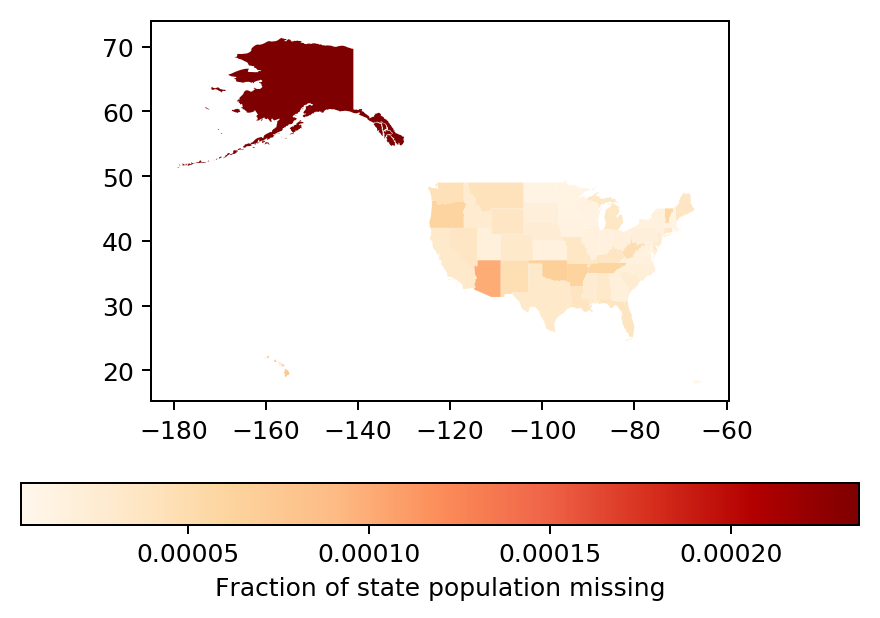

In [95]:
fig, ax = plt.subplots(1, 1)
us_trimmed.plot(column='frac_of_state', ax=ax, cmap='OrRd',legend=True, figsize=(2, 20),
            legend_kwds={'label': 'Fraction of state population missing',
                         'orientation': 'horizontal'});
